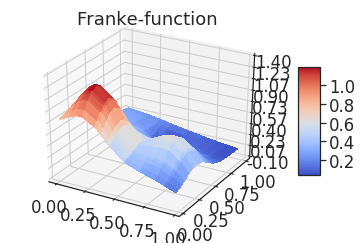

In [2]:
from classesRegression import *
observations = 30
xPlot, yPlot, zPlot = createFrankeData(plot=True, observations=observations)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

tst1 = Problem(xPlot, yPlot, zPlot, trueFunction=FrankeFunction)
maxDegree=5

In [27]:
degrees = np.arange(1,25)
bias = np.zeros(len(degrees))
variance = np.zeros(len(degrees))
noise = np.zeros(len(degrees))
#msescikit = np.zeros(len(degrees))

counter = 0
for degree in degrees:
    #degree  =20
    tst1 = LeastSquares(xPlot, yPlot, zPlot, degree, trueFunction=FrankeFunction)
    tst1.errorBootstrap(bootstraps=100)
    bias[counter] = tst1.bias2
    variance[counter] = tst1.variance
    noise[counter] = tst1.noise
    #msescikit[counter] = tst1.mseBootstrap
    counter += 1

    

In [32]:
print(np.shape(tst1.mseBootstrap))
print(np.shape(noise))

(100,)
(24,)


ValueError: x and y must have same first dimension, but have shapes (24,) and (100,)

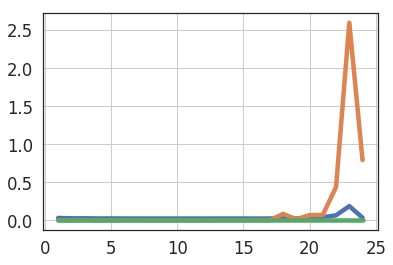

In [29]:
#print(tst1.variance, tst1.bias2, tst1.noise, tst1.totalError, tst1.totalErrorForTesting, tst1.variance + 
 #tst1.bias2 + tst1.noise)

fig, ax = plt.subplots()
ax.plot(degrees, bias)
ax.plot(degrees, variance)
ax.plot(degrees, noise)
ax.plot(degrees, tst1.mseBootstrap)
legends = ['bias', 'variance', 'noises', 'MSE scikit']
fig.legend(legends)